In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Graduate20182019-11-01_10_38_10.csv")
data

,College Code,Job Code,Door Access Actual DateTime,Door Name,Result
0,{null},{null},1/16/2018 16:20,BL_LL2100,perm sch invalid
1,{null},1771,11/28/2018 14:27,BL_LL2100,Invalid Issue Nbr
2,{null},1771,11/28/2018 14:27,BL_LL2100,Invalid Issue Nbr
3,{null},1771,11/28/2018 14:28,BL_LL2100,Invalid Issue Nbr
4,{null},1771,11/28/2018 14:28,BL_LL2100,Invalid Issue Nbr
...,...,...,...,...,...
65599,AS,1777,11/29/2017 12:29,BL_LL2200,Accepted Online
65600,AS,1777,11/29/2017 12:52,BL_LL2200,Accepted Online
65601,AS,1777,1/25/2018 13:17,BL_LL2200,Accepted Online
65602,AS,1777,3/28/2019 11:17,BL_LL2100,Accepted Online


Converting Date Time using pandas so as to get breakdowns.

In [3]:
data['Door Access Actual DateTime'] = pd.to_datetime(data['Door Access Actual DateTime'])

Creating columns for month, day, year, hour and the day of week.

In [4]:
data['date_month'] = data['Door Access Actual DateTime'].dt.month
data['date_date'] = data['Door Access Actual DateTime'].dt.day
data['date_year'] = data['Door Access Actual DateTime'].dt.year
data['date_hour'] = data['Door Access Actual DateTime'].dt.hour
data['day_of_week'] = data['Door Access Actual DateTime'].dt.dayofweek
data

,College Code,Job Code,Door Access Actual DateTime,Door Name,Result,date_month,date_date,date_year,date_hour,day_of_week
0,{null},{null},2018-01-16 16:20:00,BL_LL2100,perm sch invalid,1,16,2018,16,1
1,{null},1771,2018-11-28 14:27:00,BL_LL2100,Invalid Issue Nbr,11,28,2018,14,2
2,{null},1771,2018-11-28 14:27:00,BL_LL2100,Invalid Issue Nbr,11,28,2018,14,2
3,{null},1771,2018-11-28 14:28:00,BL_LL2100,Invalid Issue Nbr,11,28,2018,14,2
4,{null},1771,2018-11-28 14:28:00,BL_LL2100,Invalid Issue Nbr,11,28,2018,14,2
...,...,...,...,...,...,...,...,...,...,...
65599,AS,1777,2017-11-29 12:29:00,BL_LL2200,Accepted Online,11,29,2017,12,2
65600,AS,1777,2017-11-29 12:52:00,BL_LL2200,Accepted Online,11,29,2017,12,2
65601,AS,1777,2018-01-25 13:17:00,BL_LL2200,Accepted Online,1,25,2018,13,3
65602,AS,1777,2019-03-28 11:17:00,BL_LL2100,Accepted Online,3,28,2019,11,3


In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

The below figure shows the frequency of using the graduate section by month.

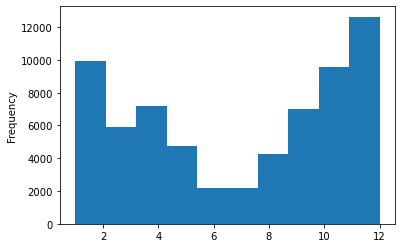

In [7]:
data['date_month'].plot.hist()

The below figure shows the frequency of using the graduate section by hour of a day.

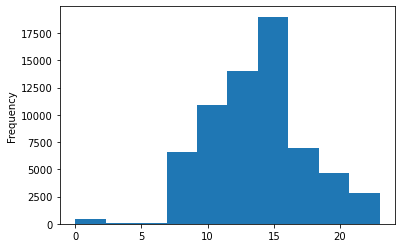

In [8]:
data['date_hour'].plot.hist()

In [9]:
data.columns

Index(['College Code', 'Job Code', 'Door Access Actual DateTime', 'Door Name',
       'Result', 'date_month', 'date_date', 'date_year', 'date_hour',
       'day_of_week'],
      dtype='object')

In [10]:
# data['date_year'].unique()

array([2018, 2017, 2019], dtype=int64)

The below figure shows the frequency of using the graduate section by day of the week.

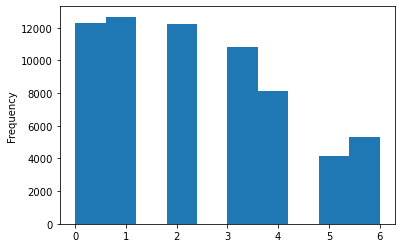

In [11]:
data['day_of_week'].plot.hist()

To get job description for all the job codes I created a dictionary with {job_code:job_description} pair. 

In [12]:
job_codes = pd.read_excel("Job Codes.xls")
job_codes.columns = job_codes.iloc[0]
job_codes = job_codes[1:]
job_codes.iloc[:,0] = job_codes.iloc[:,0].str.lstrip('0+')
job_codes=job_codes.append(pd.DataFrame([[None, "{null}"]], columns=['Descr', 'Job Code']), sort=False)

In [13]:

job_codes_dict = pd.Series(job_codes.Descr.values,index=job_codes['Job Code']).to_dict()

A job code may have 0 as its prefix which created problem while creating the job description column. So removing all the 0 prefixes.

Job_Descr_Column is the column to be appended to the data.

In [14]:
job_code_column_from_data = data['Job Code'].str.lstrip('0+')
Job_Descr_Column = [job_codes_dict[code] for code in job_code_column_from_data]


In [15]:
data['Job Description Column'] = Job_Descr_Column
data

,College Code,Job Code,Door Access Actual DateTime,Door Name,Result,date_month,date_date,date_year,date_hour,day_of_week,Job Description Column
0,{null},{null},2018-01-16 16:20:00,BL_LL2100,perm sch invalid,1,16,2018,16,1,None
1,{null},1771,2018-11-28 14:27:00,BL_LL2100,Invalid Issue Nbr,11,28,2018,14,2,Professor
2,{null},1771,2018-11-28 14:27:00,BL_LL2100,Invalid Issue Nbr,11,28,2018,14,2,Professor
3,{null},1771,2018-11-28 14:28:00,BL_LL2100,Invalid Issue Nbr,11,28,2018,14,2,Professor
4,{null},1771,2018-11-28 14:28:00,BL_LL2100,Invalid Issue Nbr,11,28,2018,14,2,Professor
...,...,...,...,...,...,...,...,...,...,...,...
65599,AS,1777,2017-11-29 12:29:00,BL_LL2200,Accepted Online,11,29,2017,12,2,Graduate Research Assistant
65600,AS,1777,2017-11-29 12:52:00,BL_LL2200,Accepted Online,11,29,2017,12,2,Graduate Research Assistant
65601,AS,1777,2018-01-25 13:17:00,BL_LL2200,Accepted Online,1,25,2018,13,3,Graduate Research Assistant
65602,AS,1777,2019-03-28 11:17:00,BL_LL2100,Accepted Online,3,28,2019,11,3,Graduate Research Assistant


The below code creates a dataframe with only student data. I have used "student" and "grad" as a search string here to search for student data. 

In [16]:
import re

student_data = pd.DataFrame(columns=data.columns)
student_data_list = []
for i in range(0, len(data)):
    job_desc = data.iloc[i,:]['Job Description Column']
    if job_desc is not None and re.search("grad", job_desc.lower()):
        student_data_list.append(list(data.iloc[i,:]))
    elif job_desc is not None and re.search("student", job_desc.lower()):
        student_data_list.append(list(data.iloc[i,:]))
student_data = pd.DataFrame(student_data_list, columns=data.columns)

Plot of student's frequency to use the graduate section by month.

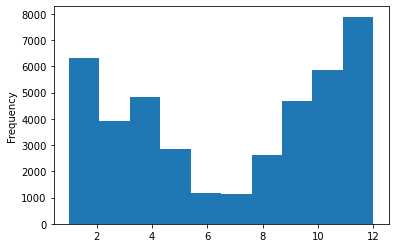

In [17]:
student_data['date_month'].plot.hist()